# Notebook for LMQAModelFlow 

In this example, we will show you how to generate question-answers (QAs) from give text strings using open-source LMQG models via uniflow's [LMQGModelFlow](https://github.com/CambioML/uniflow/blob/main/uniflow/flow/model_flow.py#L201).

### Before running the code

You will need to `uniflow` conda environment to run this notebook. You can set up the environment following the instruction: https://github.com/CambioML/uniflow/tree/main#installation.

### Update the system path

In [1]:
%reload_ext autoreload
%autoreload 2

import sys

sys.path.append(".")
sys.path.append("..")
sys.path.append("../..")

### Install extra libraries

In [2]:
!{sys.executable} -m pip install lmqg spacy
!{sys.executable} -m spacy download en_core_web_sm

  Using cached lmqg-0.1.1-py3-none-any.whl
  Using cached pandas-2.1.4-cp310-cp310-macosx_11_0_arm64.whl.metadata (18 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.8/126.8 kB 4.7 MB/s eta 0:00:00
  Using cached huggingface_hub-0.19.4-py3-none-any.whl.metadata (14 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 21.1 MB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 57.8 MB/s eta 0:00:00m eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 8.3 MB/s eta 0:00:00
  Using cached pyemd-1.0.0-cp310-cp310-macosx_11_0_arm64.whl
  Using cached nltk-3.8.1-py3-none-any.whl (1.5 MB)
  Using cached regex-2023.10.3-cp310-cp310-macosx_11_0_arm64.whl.metadata (40 kB)
  Using cached tokenizers-0.15.0-cp310-cp310-macosx_11_0_arm64.whl.metadata (6.7 kB)
  Using cached safetensors-0.4.1-cp310-cp310-macosx_11_0_arm64.whl.metadata (3.8 kB)
  Using cached sympy-1.12-py3-none-any.whl (5.7 MB)
  Using cached networkx-3.2.1-py3-none-a

>*See below for more details on `spacy` and `en_core_web_sm`:*
>- *https://github.com/explosion/spaCy/issues/4577 for en_core_web_sm issue*
>- *https://github.com/explosion/spaCy/discussions/7764 for ValueError: [E967] No factory meta information found for 'tagger'. This is likely a bug in spaCy.*

### Import dependency

In [3]:
from dotenv import load_dotenv
from IPython.display import display

from uniflow.client import Client
from uniflow.flow.flow_factory import FlowFactory
from uniflow.config import LMQGConfig
from uniflow.model.config import LMQGModelConfig
from uniflow.viz import Viz
from uniflow.schema import Context

import en_core_web_sm
nlp = en_core_web_sm.load()


/Users/joseortiz/anaconda3/envs/uniflow/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Prepare Sample Prompts
Here, we will use the following sample prompts from which to generate QAs.

In [4]:
raw_context_input = [
    """William Turner was an English painter who specialised in watercolour landscapes. He is often known
          "as William Turner of Oxford or just Turner of Oxford to distinguish him from his contemporary,
          "J. M. W. Turner. Many of Turner's paintings depicted the countryside around Oxford. One of his
          "best known pictures is a view of the city of Oxford from Hinksey Hill.""",
    """My name is bobby and I am a talent software engineer working on AI/ML."""
]

Next, for the given raw text strings `raw_context_input` above, we convert them to the `Context` class to be processed by `uniflow`.

In [5]:
data = [
  Context(context=c) for c in raw_context_input
]

### Use LLM to generate data

In this example, we will use the [LMQGModelConfig](https://github.com/CambioML/uniflow/blob/main/uniflow/model/config.py#L48)'s default LLM to generate questions and answers.

We also pass in a `batch_size` of 1. Note, base on your GPU memory, you can set your optimal `batch_size` below.

In [6]:
config = LMQGConfig(model_config=LMQGModelConfig(batch_size=1))
client = Client(config)

/Users/joseortiz/anaconda3/envs/uniflow/lib/python3.10/site-packages/transformers/models/auto/tokenization_auto.py:690: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(
/Users/joseortiz/anaconda3/envs/uniflow/lib/python3.10/site-packages/transformers/models/auto/configuration_auto.py:1067: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(
/Users/joseortiz/anaconda3/envs/uniflow/lib/python3.10/site-packages/transformers/modeling_utils.py:2759: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(


Now we call the `run` method on the `client` object to execute the question-answer generation operation on the data shown above.

In [7]:
output = client.run(data)

100%|██████████| 2/2 [00:13<00:00,  6.81s/it]


### View the generated QAs

In [8]:
output[0]['output'][0]['response']

[[('Who was an English painter who specialised in watercolour landscapes?',
   'William Turner'),
  ('What is William Turner often known as?', 'William Turner of Oxford'),
  ("What did many of William Turner's paintings depict?", 'countryside'),
  ('From where did William Turner view the city of Oxford?', 'Hinksey Hill.')]]

### Plot model flow graph
Here, we visualize the model flow graph for the `LMQGModelFlow`.

In [9]:
graph = Viz.to_digraph(output[0]['root'])

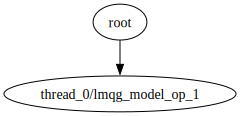

In [10]:
display(graph)

In [11]:
graph = Viz.to_digraph(output[1]['root'])

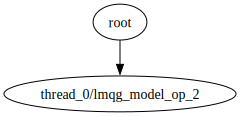

In [12]:
display(graph)